# IMPORT

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# DATASET

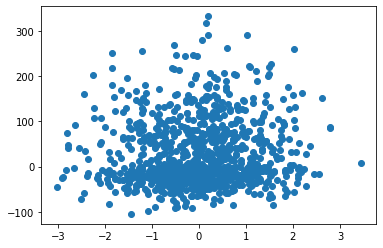

In [2]:
sample=1000
x,y = make_regression(n_samples=sample, n_features=2, noise=10)
y = y + abs(y/2)
plt.scatter(x[:,0],y)

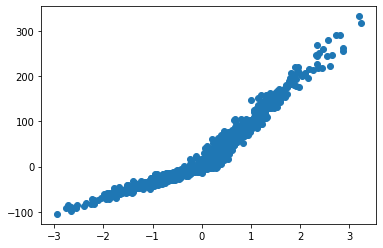

In [3]:
plt.scatter(x[:,1],y)

In [4]:
print(x.shape)
y = y.reshape(sample,1)
print(y.shape)

(1000, 2)
(1000, 1)


In [5]:
print(x.shape[0])
X = np.hstack((x, np.ones((x.shape[0],1))))
X = np.hstack((x**2, X))

1000


In [6]:
print(X[:10])

[[ 0.0227026   1.63490453 -0.15067382 -1.27863385  1.        ]
 [ 0.86719544  0.46702033  0.93123329 -0.68338886  1.        ]
 [ 0.05503412  0.07481251 -0.23459351  0.27351875  1.        ]
 [ 1.15875908  7.04750416 -1.07645673 -2.65471357  1.        ]
 [ 3.64591141  1.37749133  1.90942699  1.17366577  1.        ]
 [ 1.4683929   0.06423812  1.21177263 -0.25345241  1.        ]
 [ 0.32997287  5.99875868 -0.57443265  2.44923635  1.        ]
 [ 2.57664019  0.2166832   1.60519164 -0.46549243  1.        ]
 [ 0.86167325  0.38598584 -0.92826357  0.62127758  1.        ]
 [ 0.23621306  0.31802911  0.48601755  0.5639407   1.        ]]


In [23]:
theta = np.random.randn(5,1)
print(theta)

[[ 2.04195036]
 [-0.45862892]
 [-2.43774241]
 [ 1.93322736]
 [ 0.01443696]]


# MODELE

In [8]:
def model(X, theta):
    return X.dot(theta)

In [9]:
model(X, theta)

array([[-7.56340461e-01],
       [ 3.19172167e-01],
       [-8.74688805e-03],
       [-3.21694553e+00],
       [ 9.96445471e-01],
       [ 7.89615973e-01],
       [-3.16721707e+00],
       [ 1.21642713e+00],
       [ 3.36503009e-02],
       [ 2.38060737e-02],
       [ 1.72134593e-01],
       [ 2.22951096e-01],
       [-7.77327305e-01],
       [-2.12698386e-01],
       [-6.05216798e-01],
       [ 5.53751594e-01],
       [ 1.15651799e+00],
       [ 5.37239232e-02],
       [ 4.95285800e-03],
       [-1.71431322e-02],
       [-2.51619164e-01],
       [ 4.27514233e-01],
       [ 9.53360614e-01],
       [ 3.54717061e-01],
       [ 5.52780236e-02],
       [ 3.93288192e-02],
       [ 7.71215483e-01],
       [-1.24608875e-01],
       [ 5.39799615e-02],
       [ 4.24938744e-02],
       [ 6.01806916e-01],
       [-8.92572145e-01],
       [-4.49441170e-01],
       [-5.52202932e-01],
       [ 2.10292462e-01],
       [-2.01794206e-01],
       [ 2.62309427e-01],
       [ 1.35656058e+00],
       [-6.1

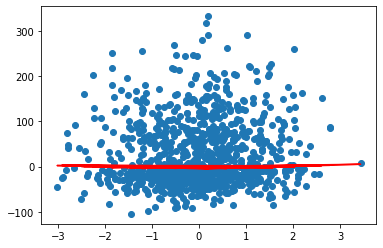

In [10]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0], model(X,theta), c='r')

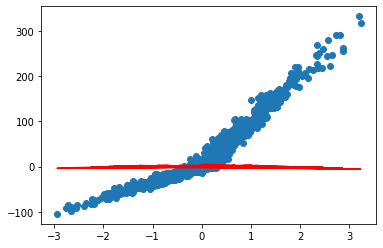

In [11]:
plt.scatter(x[:,1],y)
plt.plot(x[:,1], model(X,theta), c='r')

# COST FUNCTION

In [12]:
def cost_function(X, y, theta):
    return 1/(2*len(y))*np.sum((model(X,theta)-y)**2)

In [13]:
cost_function(X,y,theta)

2954.6363563446525

# GRADIANT

In [14]:
def grad(X,y,theta):
    return 1/len(y) * X.T.dot(model(X,theta)-y)

In [15]:
def grad_descent(X, y, theta, learn_rate, n_ite):
    cost_history = np.zeros(n_ite)
    for i in range(0, n_ite) :
        theta = theta - learn_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history   

# EXEC

In [16]:
n_ite = 300
final_theta, cost_history = grad_descent(X, y, theta, learn_rate=0.01, n_ite=n_ite)

In [17]:
final_theta

array([[ 1.21445196],
       [14.1001727 ],
       [ 2.84100939],
       [63.18135685],
       [10.42215694]])

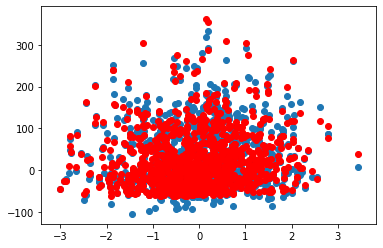

In [18]:
predictions = model(X,final_theta)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], predictions, c='r')

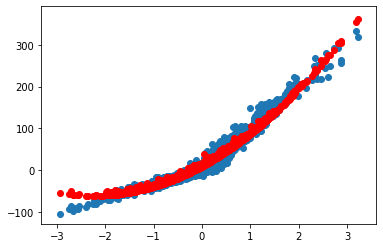

In [19]:
predictions = model(X,final_theta)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1], predictions, c='r')

<IPython.core.display.Javascript object>


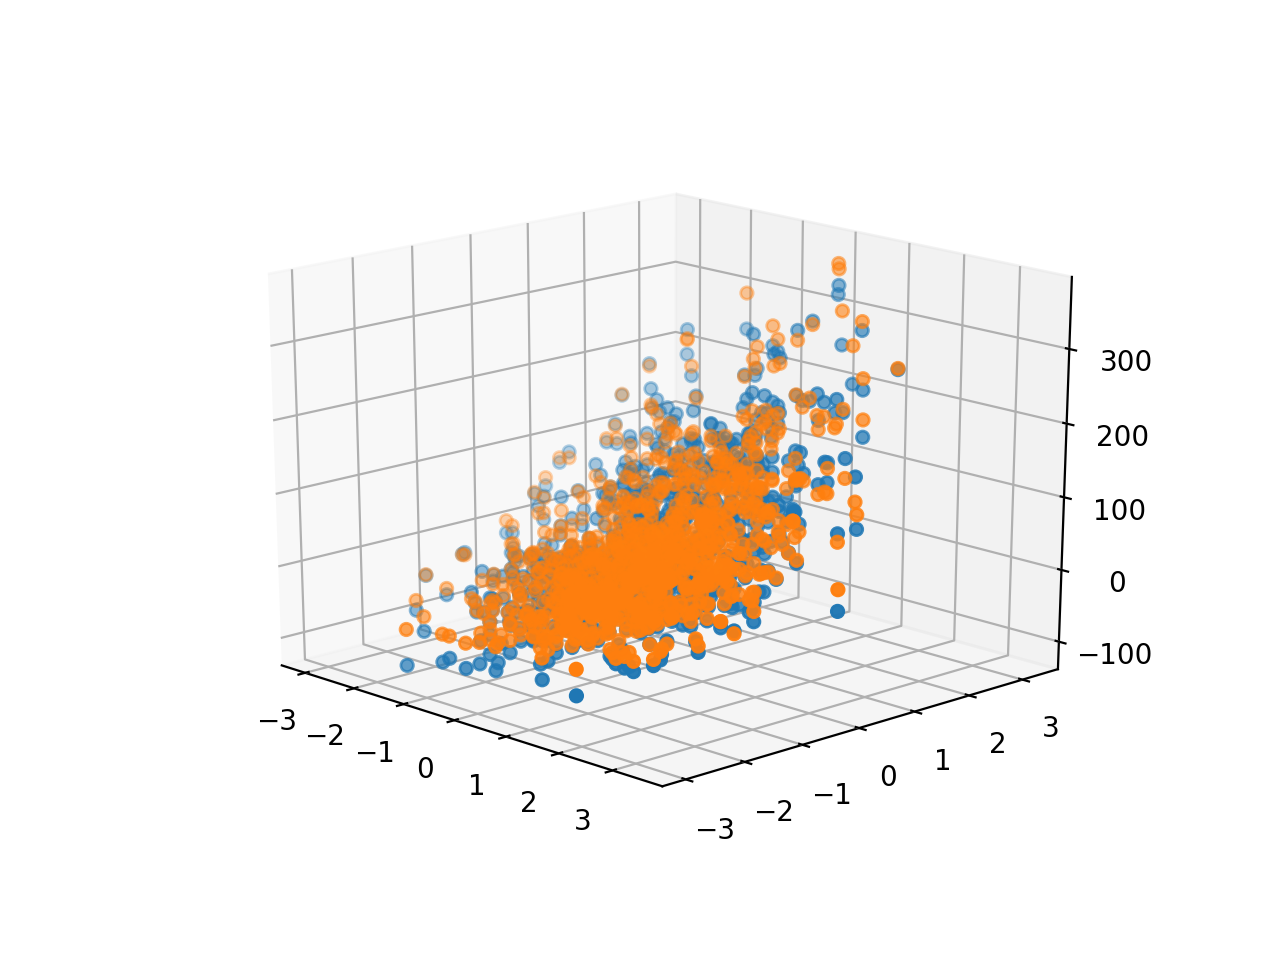

In [29]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y) # affiche en 3D la variable x_1, x_2, et la target y

# affiche les noms des axes
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

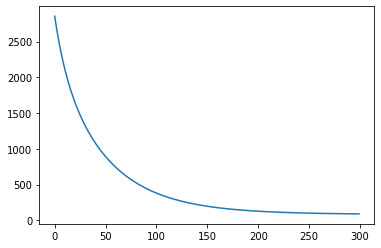

In [20]:
plt.plot(range(0,n_ite),cost_history)

# COEF DETERMINATION

In [21]:
def coef_determination(y, pred):
    u = (( y - pred )**2).sum()
    v = (( y - y.mean())**2).sum()
    return 1 - u/v

In [22]:
coef_determination(y, predictions)

0.9652384899896271